# Hidden Markov Model

### Задание матрицы перехода (M x M), эмиссионной матрицы (M x K) и вектор начальных вероятностей длины M

Численно зададим матрицу перехода, эмиссионную матрицу и вектор начальных вероятностей, i-й элемент которого отвечает вероятности попадания в i-e скрытое состояние в начальный момент времени.

Пусть будет два скрытых состояния и три видимых. Поэтому построим матрицы размерности которых (2 x 2) и (2 x 3) -  соответственно для переходной и эмиссионной.

In [143]:
import numpy as np
import matplotlib.pyplot as plt

A = [[0.4, 0.6], [0.2, 0.8]] # Матрица переходов между скрытыми состояниями
B = [[0.2, 0.5, 0.3], [0.6, 0.3, 0.1]] # Эмиссионная матрица
pi = [0.5, 0.5] # Начальное распределение вероятностей

### Генератор видимой последовательности длины n, учитывающий заданные вероятностные матрицы

Представим скрытую цепь Маркова как последовательность коробок, из которых мы достаем фрукты и выкладываем их, создавая видимую последовательность. Скрытая будет представлять из себя последовательность номеров коробок - 0 или 1

Здесь используется генератор случайных чисел от 0 до 1 для выбора коробки и выбора фрукта. Случайное число попадает в интервалы, которые определяются матрицей перехода и эмиссионной матрицей. Например, если на первом шаге  случайное число равно 0.3, то оно попадает в интервал от 0 до 0.5, который отвечает начальной вероятности выбора первой коробки (номер 0), если же число попадает в интервал от 0.5 до 1, то мы выбираем вторую коробку (с номером 1), и т.д.

In [268]:
C = [] # Список для видимой последовательности
boxes = [] # Список для скрытой последовательности
n = 40 # Длина последовательности

Things = ['Peach', 'Apple', 'Pear'] # Элементы видимой последовательности

# Построение случайных последовательностей (скрытой и видимой) с учетом матриц вероятностей

f = np.random.random()

# Выбор коробки на первом шаге с учетом начальных вероятностей
if 0 <= f < 0.5:
    box = 0
    boxes.append(box)
else:
    box = 1
    boxes.append(box)
# Выбор фрукта из коробки на первом шаге
k = np.random.random()

if box == 0:
    if 0 < k <= B[0][0]:
        C.append([Things[0], 0])
    elif B[0][0] < k <= B[0][1]:
        C.append([Things[1], 1])
    else:
        C.append([Things[2], 2])
elif box == 1:
    if 0 < k <= B[1][0]:
        C.append([Things[0], 0])
    elif B[1][0] < k <= B[1][1]:
        C.append([Things[1], 1])
    else:
        C.append([Things[2], 2])

# Цикл для последующих шагов
for i in range(1, n):
    
    f = np.random.random()
    if 0 < f <= A[box][0]:
        box = 0
    else:
        box = 1
    boxes.append(box)
    
    k = np.random.random()
    if 0 < k <= B[box][0]:
        C.append([Things[0], 0])
    elif B[box][0] < k <= B[box][1]:
        C.append([Things[1], 1])
    else:
        C.append([Things[2], 2])

print(boxes)
print('\n', C)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]

 [['Pear', 2], ['Pear', 2], ['Pear', 2], ['Pear', 2], ['Pear', 2], ['Pear', 2], ['Pear', 2], ['Pear', 2], ['Peach', 0], ['Peach', 0], ['Pear', 2], ['Pear', 2], ['Peach', 0], ['Pear', 2], ['Peach', 0], ['Pear', 2], ['Apple', 1], ['Peach', 0], ['Peach', 0], ['Peach', 0], ['Apple', 1], ['Pear', 2], ['Peach', 0], ['Peach', 0], ['Pear', 2], ['Pear', 2], ['Pear', 2], ['Peach', 0], ['Peach', 0], ['Pear', 2], ['Peach', 0], ['Pear', 2], ['Peach', 0], ['Apple', 1], ['Peach', 0], ['Peach', 0], ['Peach', 0], ['Pear', 2], ['Apple', 1], ['Peach', 0]]


Мы получили случайную последовательность скрытых состояний (номера коробок 0 или 1) и видимых состояний (фрукты и рядом их номера).

### Алгоритм Витерби

С помощью алгоритма можно попытаться восстановить скрытую последовательность, используя видимую и знания о вероятностях

In [269]:
V = np.zeros((n, 2))

for i in range(2):
    V[0][i] = pi[i] * B[i][C[0][1]]
for i in range(1, n):
    for j in range(2):
        V[i][j] = B[j][C[i][1]] * max(V[i - 1][0] * A[0][j], V[i - 1][1] * A[1][j])

m = np.argmax(V, axis=1) # какой из двух столбцов содержит большее число в каждой строке
print(m)

[0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1]


Построим диаграммы для сравнения исходной последовательности и полученной алгоритмом Витерби

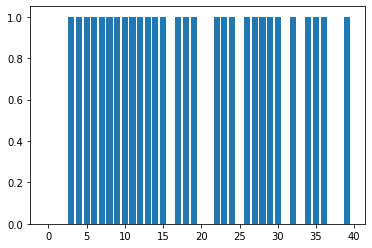

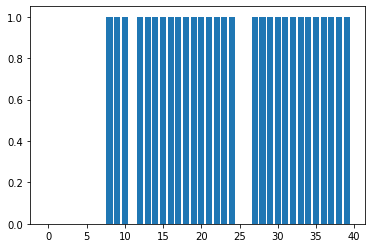

In [270]:
x = np.arange(n)

g1 = plt.bar(x, boxes)
plt.show()

g2 = plt.bar(x, m)
plt.show()

Синим цветом обозначены фактические выпадения номера '1' сгенерированной последовательности на верхнем рисунке. На нижнем - выпадения '1' из последовательности, построенной алгоритмом Витерби. Пробелы между ними - выпадение 0.

Можно заметить, что есть участки, где последовательности хорошо совпадают и, в целом, диаграммы похожи.

### Применение прямого алгоритма для поиска вероятности P(x)

In [271]:
f = np.zeros((n, 2))
f[0][0] = 1
summ = 0
for i in range(1, n):
    for l in range(2):
        summ = 0
        for k in range(2):
            summ = summ + f[i - 1][k] * A[k][l]
        f[i][l] = B[l][C[i][1]] * summ

P1 = f[n - 1][0] + f[n - 1][1]
print('P1 =', P1)

P1 = 2.617753569556543e-22


### Применение обратного алгоритма для поиска вероятности P(x)

In [272]:
b = np.zeros((n, 2))
for k in range(2):
    b[n - 1][k] = 1
for i in range(n - 2, -1, -1):
    for k in range(2):
        sumo = 0
        for l in range(2):
            sumo = sumo + A[k][l] * B[l][C[i + 1][1]] * b[i + 1][l]
            b[i][k] = sumo

P2 = 0
for l in range(2):
    P2 = P2 + A[0][l] * B[l][C[0][1]] * b[1][l]
print('P2 =', P2)


P2 = 2.6177535695565417e-22


Оба алгоритма дают одно и тоже число P. Используем полученные матрицы и вероятность P для последующего апостериорного декодирования

### Апостериорное декодирование

In [273]:
P = np.zeros((n, 2))
for i in range(n):
    for k in range(2):
        P[i][k] = (f[i][k] * b[i][k]) / P1
print(P)

[[1.         0.        ]
 [0.73507525 0.26492475]
 [0.67537627 0.32462373]
 [0.66170574 0.33829426]
 [0.65760892 0.34239108]
 [0.652161   0.347839  ]
 [0.63083414 0.36916586]
 [0.53675673 0.46324327]
 [0.11905569 0.88094431]
 [0.1167842  0.8832158 ]
 [0.50934741 0.49065259]
 [0.51650244 0.48349756]
 [0.15732938 0.84267062]
 [0.43340007 0.56659993]
 [0.1531944  0.8468056 ]
 [0.48176861 0.51823139]
 [0.36462311 0.63537689]
 [0.0982706  0.9017294 ]
 [0.07618141 0.92381859]
 [0.09808023 0.90191977]
 [0.36251631 0.63748369]
 [0.47231417 0.52768583]
 [0.11317851 0.88682149]
 [0.11794668 0.88205332]
 [0.52985009 0.47014991]
 [0.60251419 0.39748581]
 [0.52970996 0.47029004]
 [0.11729274 0.88270726]
 [0.10819923 0.89180077]
 [0.41998157 0.58001843]
 [0.1448074  0.8551926 ]
 [0.42480137 0.57519863]
 [0.12885552 0.87114448]
 [0.28598575 0.71401425]
 [0.0911885  0.9088115 ]
 [0.07643851 0.92356149]
 [0.10800263 0.89199737]
 [0.47206213 0.52793787]
 [0.36636671 0.63363329]
 [0.11535315 0.88464685]]

Получили матрицу из двух столбцов, каждый из которых отвечает разным коробкам (разным скрытым состояниям). Элементы - это вероятности на каждом шаге (то есть на каждой строке) получить 0-е или 1-е скрытое состояние (0-й или 1-й столбец).

Построим график второго столбца матрицы, который означает попадание во второй ящик (с номером 1) и диаграмму скрытой последовательности

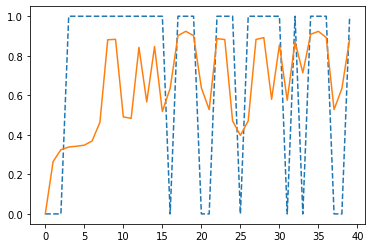

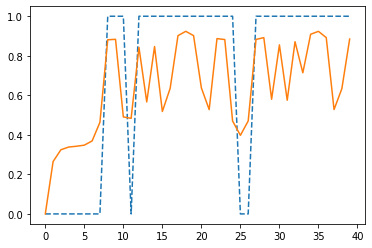

In [274]:
g3 = plt.plot(x, boxes, linestyle='--')
g4 = plt.plot(x, P[:, 1])
plt.show()

gg3 = plt.plot(x, m, linestyle='--')
gg4 = plt.plot(x, P[:, 1])
plt.show()

График изменения вероятности от номера шага выполнен оранжевой сплошной линией

На графиках можно заметить что высокая вероятность выпадения коробки номер 1 хорошо соответствует и фактическому выпадению этой коробки (верхний рисунок), и выпадению в последовательности, составленной по Витерби (нижний рисунок).

### Алгоритм Баума-Велша

In [277]:
# Прямой алгоритм для Баума-Велша

a = np.zeros((n, 2)) 

for k in range(2):
    a[0][k] = pi[k] * B[k][C[0][1]] # Начальные вероятности для алгоритма

for i in range(1, n):
    for l in range(2):
        s1 = 0
        for k in range(2):
            s1 = s1 + a[i - 1][k] * A[k][l]
        a[i][l] = B[l][C[i][1]] * s1

# Обратный алгоритм для Баума-Велша

beta = np.zeros((n, 2))

for k in range(2):
    beta[n - 1][k] = 1

for i in range(n - 2, -1, -1):
    for k in range(2):
        s2 = 0
        for l in range(2):
            s2 = s2 + A[k][l] * B[l][C[i + 1][1]] * beta[i + 1][l]
            beta[i][k] = s2

# Определим временные переменные 'gamma' и 'e', с помощью которых в дальнейшем можно будет определить
# новые матрицы перехода и эмиссии

gamma = np.zeros((n, 2))

for t in range(n):
    for i in range(2):
        s3 = 0
        for j in range(2):
            s3 = s3 + a[t][j] * beta[t][j]
        gamma[t][i] = (a[t][i] * beta[t][i]) / s3

e = np.zeros((n, 2, 2))

s4 = 0
for t in range(n):
    s4 = 0
    for i in range(2):
        for j in range(2):
            s4 = s4 + a[t - 1][i] * A[i][j] * B[j][C[t][1]] * beta[t][j]
    for i in range(2):
        for j in range(2):
            e[t - 1][i][j] = (a[t - 1][i] * A[i][j] * beta[t][j] * B[j][C[t][1]]) / s4

Aa = np.zeros((2, 2)) # новая матрица перехода
Bb = np.zeros((2, 3)) # новая матрица эмиссии

for i in range(2):
    pi[i] = gamma[0][i]

for i in range(2):
    for j in range(2):
        s4 = 0
        s5 = 0
        for t in range(n - 1):
            s4 = s4 + e[t][i][j]
            s5 = s5 + gamma[t][i]
        Aa[i][j] = s4 / s5

print('Aa: \n', Aa)
for i in range(2):
    for j in range(n):
        s4 = 0
        s5 = 0
        for t in range(n):
            if C[t][1] == C[j][1]:
                delta = 1
            else:
                delta = 0
            s4 = s4 + delta * gamma[t][i]
            s5 = s5 + gamma[t][i]
        Bb[i][C[j][1]] = s4 / s5

print('Bb: \n', Bb)


# Используем алгоритм с новыми матрицами
list_Aa = []
list_Bb = []

list_Aa.append(Aa.tolist())
list_Bb.append(Bb.tolist())

for k in range(2):
    a[0][k] = pi[k] * Bb[k][C[0][1]]
# forward
for i in range(1, n):
    for l in range(2):
        s1 = 0
        for k in range(2):
            s1 = s1 + a[i - 1][k] * Aa[k][l]
        a[i][l] = Bb[l][C[i][1]] * s1

# backward
for k in range(2):
    beta[n - 1][k] = 1
for i in range(n - 2, -1, -1):
    for k in range(2):
        s2 = 0
        for l in range(2):
            s2 = s2 + Aa[k][l] * Bb[l][C[i + 1][1]] * beta[i + 1][l]
            beta[i][k] = s2            
# gamma
for t in range(n):
    for i in range(2):
        s3 = 0
        for j in range(2):
            s3 = s3 + a[t][j] * beta[t][j]
        gamma[t][i] = (a[t][i] * beta[t][i]) / s3
# eps
for t in range(n):
    s4 = 0
    for i in range(2):
        for j in range(2):
            s4 = s4 + a[t - 1][i] * Aa[i][j] * Bb[j][C[t][1]] * beta[t][j]
    for i in range(2):
        for j in range(2):
            e[t - 1][i][j] = (a[t - 1][i] * Aa[i][j] * beta[t][j] * Bb[j][C[t][1]]) / s4
# Aa
for i in range(2):
    for j in range(2):
        s4 = 0
        s5 = 0
        for t in range(n - 1):
            s4 = s4 + e[t][i][j]
            s5 = s5 + gamma[t][i]
        Aa[i][j] = s4 / s5
list_Aa.append(Aa.tolist())
# Bb
for i in range(2):
    for j in range(n):
        s4 = 0
        s5 = 0
        for t in range(n):
            if C[t][1] == C[j][1]:
                delta = 1
            else:
                delta = 0
            s4 = s4 + delta * gamma[t][i]
            s5 = s5 + gamma[t][i]
        Bb[i][C[j][1]] = s4 / s5
list_Bb.append(Bb.tolist())
        
# Цикл для алгоритма поиска матриц

u = 0
dd = 0.0001
while abs(list_Aa[u][0][0] - list_Aa[u + 1][0][0]) > dd:
    u = u + 1
    for k in range(2):
        a[0][k] = pi[k] * Bb[k][C[0][1]]
    # forward
    for i in range(1, n):
        for l in range(2):
            s1 = 0
            for k in range(2):
                s1 = s1 + a[i - 1][k] * Aa[k][l]
            a[i][l] = Bb[l][C[i][1]] * s1
    # backward
    for k in range(2):
        beta[n - 1][k] = 1
    for i in range(n - 2, -1, -1):
        for k in range(2):
            s2 = 0
            for l in range(2):
                s2 = s2 + Aa[k][l] * Bb[l][C[i + 1][1]] * beta[i + 1][l]
                beta[i][k] = s2
    # gamma
    for t in range(n):
        for i in range(2):
            s3 = 0
            for j in range(2):
                s3 = s3 + a[t][j] * beta[t][j]
            gamma[t][i] = (a[t][i] * beta[t][i]) / s3
    # eps
    for t in range(n):
        s4 = 0
        for i in range(2):
            for j in range(2):
                s4 = s4 + a[t - 1][i] * Aa[i][j] * Bb[j][C[t][1]] * beta[t][j]
        for i in range(2):
            for j in range(2):
                e[t - 1][i][j] = (a[t - 1][i] * Aa[i][j] * beta[t][j] * Bb[j][C[t][1]]) / s4
    # Aa
    for i in range(2):
        for j in range(2):
            s4 = 0
            s5 = 0
            for t in range(n - 1):
                s4 = s4 + e[t][i][j]
                s5 = s5 + gamma[t][i]
            Aa[i][j] = s4 / s5
    list_Aa.append(Aa.tolist())

    # Bb
    for i in range(2):
        for j in range(n):
            s4 = 0
            s5 = 0
            for t in range(n):
                if C[t][1] == C[j][1]:
                    delta = 1
                else:
                    delta = 0
                s4 = s4 + delta * gamma[t][i]
                s5 = s5 + gamma[t][i]
            Bb[i][C[j][1]] = s4 / s5
    list_Bb.append(Bb.tolist())

print('New Aa: \n', Aa)
print('New Bb: \n', Bb)
print('\n','Количество итераций, необходимое для того, чтобы матрицы сходились с погрешностью dd =', dd, ':',len(list_Aa))

Aa: 
 [[0.49655067 0.50344933]
 [0.25096801 0.74903199]]
Bb: 
 [[0.13621107 0.09684881 0.76694012]
 [0.58470667 0.10174268 0.31355065]]
New Aa: 
 [[8.62945099e-01 1.37054901e-01]
 [1.27295049e-05 9.99987270e-01]]
New Bb: 
 [[2.79317315e-08 4.86674438e-24 9.99999972e-01]
 [5.19861163e-01 1.22320275e-01 3.57818562e-01]]

 Количество итераций, необходимое для того, чтобы матрицы сходились с погрешностью dd = 0.0001 : 18


Получили окончательные матрицы перехода и эмиссии с помощью алгоритма Баума-Велша

## Нечестное казино

С помощью выполненных выше алгоритмов построим скрытую модель Маркова для задачи нечестного казино. Одна игральная кость имеет равные вероятности выпадения чисел 1, 2, 3, 4, 5, 6, которые равны 1/6. Другая кость имеет вероятность выпадения шестерки равную 0.5.

Вероятность перейти от правильной кости к неправильной - 0.05, обратно - 0.1

В соответствии с этим построим матрицы перехода и эмиссии - Tr и Em.

Пусть начальная вероятность P0 выбрать одну из костей равна 0.5

In [299]:
import numpy as np
import matplotlib.pyplot as plt
Tr = [[0.95, 0.05], [0.1, 0.9]]
Em = [[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]
P0 = [0.5, 0.5]

In [320]:
seq = [] # Список для видимой последовательности
dices = [] # Список для скрытой последовательности
n = 200 # Длина последовательности

number = ['1', '2', '3', '4', '5', '6'] # Элементы видимой последовательности - числа на игральных кубиках

# Построение случайных последовательностей


f = np.random.random() # Случайное число попадет в один из интервалов
if 0 <= f < 0.5: # Выбирается 1 или 2 игральная кость
    dice = 0
else:
    dice = 1

dices.append(dice)

k = np.random.random() # Случайное число для броска игральной кости
q = 0
v = 0
for l in range(6): # Цикл суммы для определения в какой из интервалов вероятностей попадет случайное число
    q = q + Em[dice][l]
    v = q - k
    if v >= 0:
        seq.append([number[l], l])
        break
# Если разность между случайным числом и суммой из вероятностей становится положительной, выпадает соответствующий номер кости

# Цикл для последующего построения последовательностей
for j in range(1, n):

    p = np.random.random()
    if 0 <= p < Tr[dice][0]:
        dice = 0
    else:
        dice = 1
    dices.append(dice)

    g = np.random.random()
    o = 0
    w = 0
    for l in range(6):
        o = o + Em[dice][l]
        w = o - g
        if w >= 0:
            seq.append([number[l], l])
            break

print("Видимая последовательность(в кавычках указан номер, выпавший на кубике, рядом - его номер в массиве наблюдений):", '\n', seq)
print('\n', "Сгенерированная скрытая последовательность:",'\n', dices)

# Алгоритм Витерби

V = np.zeros((n, 2))

for i in range(2):
    V[0][i] = P0[i] * Em[i][seq[0][1]]

for k in range(1, n):
    for t in range(2):
        V[k][t] = Em[t][seq[k][1]] * max(V[k - 1][0] * Tr[0][t], V[k - 1][1] * Tr[1][t])

mm = np.argmax(V, axis=1)
print('\n','Последовательность по алгоритму Витерби:','\n',  mm)

Видимая последовательность(в кавычках указан номер, выпавший на кубике, рядом - его номер в массиве наблюдений): 
 [['5', 4], ['1', 0], ['4', 3], ['6', 5], ['1', 0], ['5', 4], ['6', 5], ['6', 5], ['6', 5], ['6', 5], ['1', 0], ['5', 4], ['3', 2], ['3', 2], ['2', 1], ['6', 5], ['3', 2], ['3', 2], ['3', 2], ['6', 5], ['1', 0], ['6', 5], ['1', 0], ['4', 3], ['6', 5], ['6', 5], ['5', 4], ['6', 5], ['6', 5], ['1', 0], ['4', 3], ['6', 5], ['6', 5], ['1', 0], ['6', 5], ['4', 3], ['4', 3], ['2', 1], ['3', 2], ['3', 2], ['1', 0], ['3', 2], ['1', 0], ['2', 1], ['5', 4], ['6', 5], ['1', 0], ['2', 1], ['4', 3], ['6', 5], ['2', 1], ['6', 5], ['6', 5], ['2', 1], ['4', 3], ['2', 1], ['2', 1], ['4', 3], ['5', 4], ['2', 1], ['6', 5], ['6', 5], ['1', 0], ['6', 5], ['5', 4], ['6', 5], ['6', 5], ['6', 5], ['5', 4], ['5', 4], ['6', 5], ['4', 3], ['3', 2], ['6', 5], ['4', 3], ['6', 5], ['4', 3], ['5', 4], ['5', 4], ['5', 4], ['3', 2], ['6', 5], ['6', 5], ['6', 5], ['1', 0], ['6', 5], ['1', 0], ['6', 5], ['2'

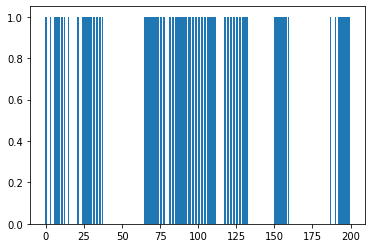

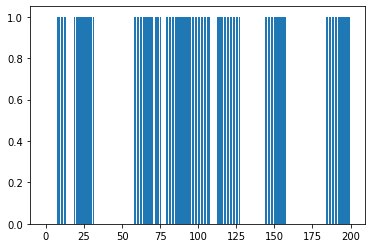

In [321]:
y = np.arange(n)
g5 = plt.bar(y, mm)
plt.show()

g6 = plt.bar(y, dices)
plt.show()

Нижний график соответствует фактическому выпадению кубика номер 1 (нечестного).
Верхний отражает построение последовательности по алгоритму Витерби

In [345]:
h = 0
for i in range(n):
    if mm[i] == dices[i]:
        h = h + 1

x = 100 * h / n
print(x,'%','- процент совпадений')

71.5 % - процент совпадений


### Прямой и обратный алгоритм. Поиск вероятности P

In [340]:
f = np.zeros((n, 2))
f[0][0] = 1
summ = 0
for i in range(1, n):
    for l in range(2):
        summ = 0
        for k in range(2):
            summ = summ + f[i - 1][k] * Tr[k][l]
        f[i][l] = Em[l][seq[i][1]] * summ

P1 = f[n - 1][0] + f[n - 1][1]
print('P1 =', P1)

P1 = 2.412034860975207e-146


In [323]:
b = np.zeros((n, 2))
for k in range(2):
    b[n - 1][k] = 1
for i in range(n - 2, -1, -1):
    for k in range(2):
        sumo = 0
        for l in range(2):
            sumo = sumo + Tr[k][l] * Em[l][seq[i + 1][1]] * b[i + 1][l]
            b[i][k] = sumo

P2 = 0
for l in range(2):
    P2 = P2 + Tr[0][l] * Em[l][seq[0][1]] * b[1][l]
print('P2 =', P2)

P2 = 2.4120348609752213e-146


In [324]:
P = np.zeros((n, 2))
for i in range(n):
    for k in range(2):
        P[i][k] = (f[i][k] * b[i][k]) / P1
# print(P)

Построим второй столбец матрицы P, который соответствует вероятности выпадения нечестной игральной кости и сравним с диаграммой ее выпадения:

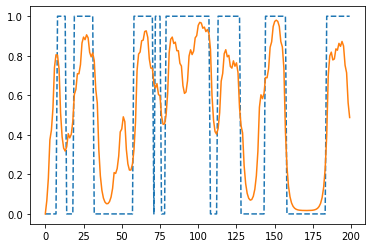

In [325]:
z = np.arange(n)
g3 = plt.plot(z, dices, linestyle='--')
g4 = plt.plot(y, P[:, 1])
plt.show()


### Алгоритм Баума-Велша для задачи нечестного казино

In [341]:
# forward algorithm for B-W

alf = np.zeros((n, 2)) 

for k in range(2):
    alf[0][k] = P0[k] * Em[k][seq[0][1]] # Начальные вероятности для алгоритма

for i in range(1, n):
    for l in range(2):
        s1 = 0
        for k in range(2):
            s1 = s1 + alf[i - 1][k] * Tr[k][l]
        alf[i][l] = Em[l][seq[i][1]] * s1

# backward algorithm for B-W

beta = np.zeros((n, 2))

for k in range(2):
    beta[n - 1][k] = 1

for i in range(n - 2, -1, -1):
    for k in range(2):
        s2 = 0
        for l in range(2):
            s2 = s2 + Tr[k][l] * Em[l][seq[i + 1][1]] * beta[i + 1][l]
            beta[i][k] = s2


In [342]:
# Определим временные переменные gamma и e, с помощью которых в дальнейшем можно будет определить
# новые матрицы перехода и эмиссии

gamma = np.zeros((n, 2))

for t in range(n):
    for i in range(2):
        s3 = 0
        for j in range(2):
            s3 = s3 + alf[t][j] * beta[t][j]
        gamma[t][i] = (alf[t][i] * beta[t][i]) / s3

e = np.zeros((n, 2, 2))
s4 = 0

for t in range(n):
    s4 = 0
    for i in range(2):
        for j in range(2):
            s4 = s4 + alf[t - 1][i] * Tr[i][j] * Em[j][seq[t][1]] * beta[t][j]
    for i in range(2):
        for j in range(2):
            e[t - 1][i][j] = (alf[t - 1][i] * Tr[i][j] * beta[t][j] * Em[j][seq[t][1]]) / s4



In [343]:
A = np.zeros((2, 2)) # новая матрица перехода
B = np.zeros((2, 6)) # новая матрица эмиссии

# C помощью матриц Tr и Em находим новые матрицы A и B
for i in range(2):
    P0[i] = gamma[0][i]

for i in range(2):
    for j in range(2):
        s4 = 0
        s5 = 0
        for t in range(n - 1):
            s4 = s4 + e[t][i][j]
            s5 = s5 + gamma[t][i]
        A[i][j] = s4 / s5

print('A: \n', A)

for i in range(2):
    for j in range(n):
        s4 = 0
        s5 = 0
        for t in range(n):
            if seq[t][1] == seq[j][1]:
                delta = 1
            else:
                delta = 0
            s4 = s4 + delta * gamma[t][i]
            s5 = s5 + gamma[t][i]
        B[i][seq[j][1]] = s4 / s5

print('B: \n', B)

# Используем матрицы A и B, обновляя A и B до более точных значений

list_A = []
list_B = []

list_A.append(A.tolist())
list_B.append(B.tolist())

for k in range(2):
    alf[0][k] = P0[k] * B[k][seq[0][1]]
    
# forward
for i in range(1, n):
    for l in range(2):
        s1 = 0
        for k in range(2):
            s1 = s1 + alf[i - 1][k] * A[k][l]
        alf[i][l] = B[l][seq[i][1]] * s1
    
# backward
for k in range(2):
    beta[n - 1][k] = 1
for i in range(n - 2, -1, -1):
    for k in range(2):
        s2 = 0
        for l in range(2):
            s2 = s2 + A[k][l] * B[l][seq[i + 1][1]] * beta[i + 1][l]
            beta[i][k] = s2
    
# gamma
for t in range(n):
    for i in range(2):
        s3 = 0
        for j in range(2):
            s3 = s3 + alf[t][j] * beta[t][j]
        gamma[t][i] = (alf[t][i] * beta[t][i]) / s3
# eps
for t in range(n):
    s4 = 0
    for i in range(2):
        for j in range(2):
            s4 = s4 + alf[t - 1][i] * A[i][j] * B[j][seq[t][1]] * beta[t][j]
    for i in range(2):
        for j in range(2):
            e[t - 1][i][j] = (alf[t - 1][i] * A[i][j] * beta[t][j] * B[j][seq[t][1]]) / s4
    
# A
for i in range(2):
    for j in range(2):
        s4 = 0
        s5 = 0
        for t in range(n - 1):
            s4 = s4 + e[t][i][j]
            s5 = s5 + gamma[t][i]
        A[i][j] = s4 / s5
list_A.append(A.tolist())

# B
for i in range(2):
    for j in range(n):
        s4 = 0
        s5 = 0
        for t in range(n):
            if seq[t][1] == seq[j][1]:
                delta = 1
            else:
                delta = 0
            s4 = s4 + delta * gamma[t][i]
            s5 = s5 + gamma[t][i]
        B[i][seq[j][1]] = s4 / s5
list_B.append(B.tolist())

                                        # Цикл для алгоритма поиска матриц
u = 0
dd = 0.0001
while abs(list_A[u][0][0] - list_A[u + 1][0][0]) > dd and abs(list_A[u][0][1] - list_A[u + 1][0][1]) > dd and abs(list_A[u][1][0] - list_A[u + 1][1][0]) > dd:
    u = u + 1
    for k in range(2):
        alf[0][k] = P0[k] * B[k][seq[0][1]]
    
    # forward
    for i in range(1, n):
        for l in range(2):
            s1 = 0
            for k in range(2):
                s1 = s1 + alf[i - 1][k] * A[k][l]
            alf[i][l] = B[l][seq[i][1]] * s1
    
    # backward
    for k in range(2):
        beta[n - 1][k] = 1
    for i in range(n - 2, -1, -1):
        for k in range(2):
            s2 = 0
            for l in range(2):
                s2 = s2 + A[k][l] * B[l][seq[i + 1][1]] * beta[i + 1][l]
                beta[i][k] = s2
    
    # gamma
    for t in range(n):
        for i in range(2):
            s3 = 0
            for j in range(2):
                s3 = s3 + alf[t][j] * beta[t][j]
            gamma[t][i] = (alf[t][i] * beta[t][i]) / s3
    # eps
    for t in range(n):
        s4 = 0
        for i in range(2):
            for j in range(2):
                s4 = s4 + alf[t - 1][i] * A[i][j] * B[j][seq[t][1]] * beta[t][j]
        for i in range(2):
            for j in range(2):
                e[t - 1][i][j] = (alf[t - 1][i] * A[i][j] * beta[t][j] * B[j][seq[t][1]]) / s4
    
    # A
    for i in range(2):
        for j in range(2):
            s4 = 0
            s5 = 0
            for t in range(n - 1):
                s4 = s4 + e[t][i][j]
                s5 = s5 + gamma[t][i]
            A[i][j] = s4 / s5
    list_A.append(A.tolist())

    # B
    for i in range(2):
        for j in range(n):
            s4 = 0
            s5 = 0
            for t in range(n):
                if seq[t][1] == seq[j][1]:
                    delta = 1
                else:
                    delta = 0
                s4 = s4 + delta * gamma[t][i]
                s5 = s5 + gamma[t][i]
            B[i][seq[j][1]] = s4 / s5
    list_B.append(B.tolist())
            
print('New A: \n', A)
print('New B: \n', B)
print('\n','Количество итераций:', len(list_A))
print("Точность сходимости матриц:", dd)



A: 
 [[0.91439427 0.08560573]
 [0.07265326 0.92734674]]
B: 
 [[0.16504869 0.2095409  0.1585476  0.19997016 0.09859362 0.16829903]
 [0.11103214 0.08453181 0.09824129 0.09216576 0.11010994 0.50391906]]
New A: 
 [[0.89093613 0.10906387]
 [0.03307658 0.96692342]]
New B: 
 [[0.19809423 0.29484362 0.1481581  0.30411807 0.04644761 0.00833836]
 [0.11630237 0.09411295 0.11813722 0.09136452 0.12235168 0.45773127]]

 Количество итераций: 13
Точность сходимости матриц: 0.0001
